# Exploring 5 Years of European Football

Intro
In this notebook we will explore modern metrics in football (xG, xGA and xPTS) and its' influence in sport analytics.

Expected Goals (xG) - measures the quality of a shot based on several variables such as assist type, shot angle and distance from goal, whether it was a headed shot and whether it was defined as a big chance.

Expected Assits (xGA) - measures the likelihood that a given pass will become a goal assist. It considers several factors including the type of pass, pass end-point and length of the pass.

Expected Points (xPTS) - measures the likelihood of a certaing game to bring points to the team.

These metrics let us look much deeper into football statistics and understand performance of players and teams in general and realize the role of luck and skill in it. Disclaimer: they are both important

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'E:\\Football Analysis\understat.com.csv')
df = df.rename(index=int, columns={'Unnamed: 0': 'league', 'Unnamed: 1': 'year'}) 
df.head()

,league,year,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


Standard parameters: position, team, amount of matches played, wins, draws, loses, goals scored, goals missed, points.

Additional metrics:

xG - expected goals metric, it is a statistical measure of the quality of chances created and conceded. More at understat.com

xG_diff - difference between actual goals scored and expected goals.

npxG - expected goals without penalties and own goals.

xGA - expected goals against.

xGA_diff - difference between actual goals missed and expected goals against.

npxGA - expected goals against without penalties and own goals.

npxGD - difference between "for" and "against" expected goals without penalties and own goals.

ppda_coef - passes allowed per defensive action in the opposition half (power of pressure)

oppda_coef - opponent passes allowed per defensive action in the opposition half (power of opponent's pressure)

deep - passes completed within an estimated 20 yards of goal (crosses excluded)

deep_allowed - opponent passes completed within an estimated 20 yards of goal (crosses excluded)

xpts - expected points

xpts_diff - difference between actual and expected points

In [3]:
#Leagues Numbers 
df['league'].value_counts()

EPL           100
La_liga       100
Ligue_1       100
Serie_A       100
Bundesliga     90
RFPL           80
Name: league, dtype: int64

In the next visualization we will check how many teams from each league were in top 4 during last 5 years. It can give us some info about stability of top teams from different countries.

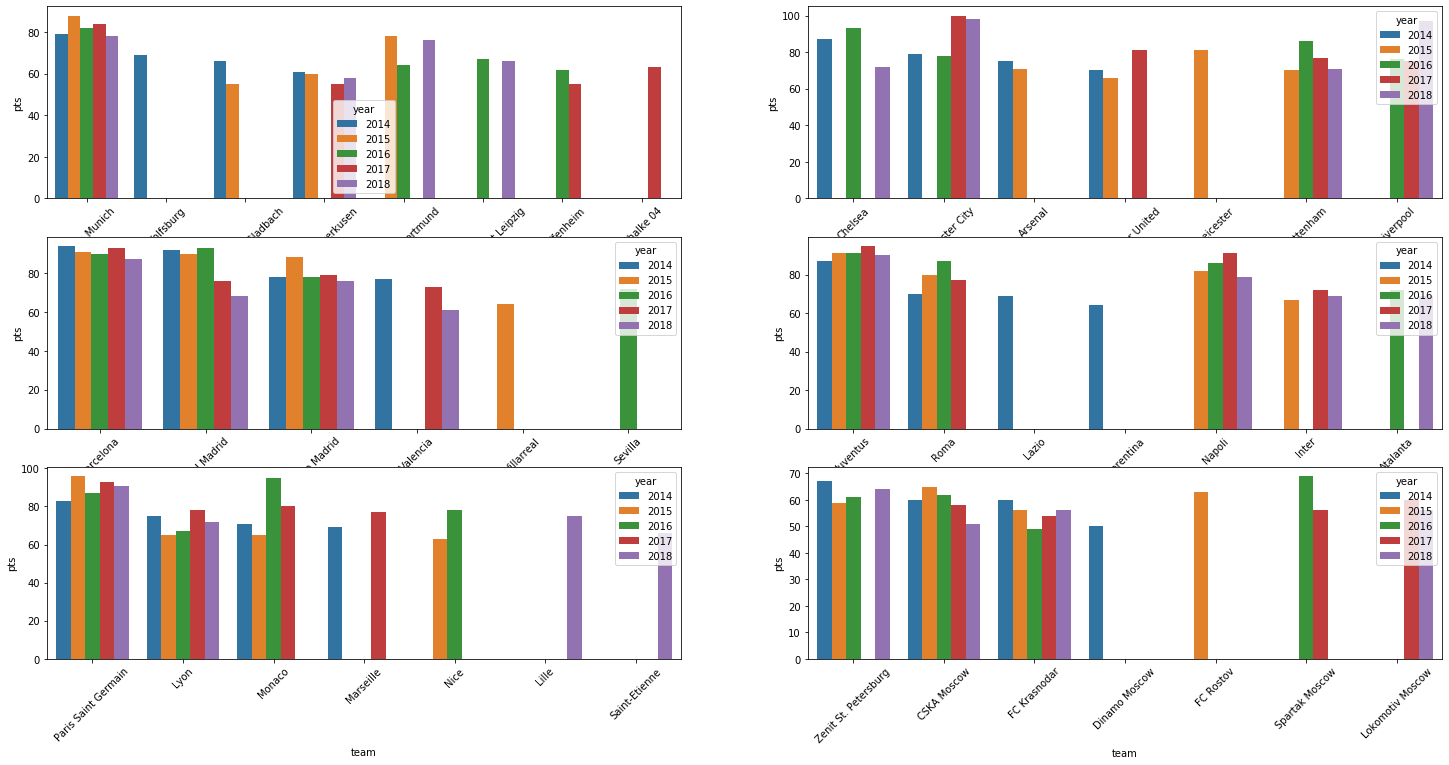

In [4]:
f = plt.figure(figsize=(25,12))
ax = f.add_subplot(3,2,1)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='year', data=df[(df['league'] == 'Bundesliga') & (df['position'] <= 4)], ax=ax)
ax = f.add_subplot(3,2,2)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='year', data=df[(df['league'] == 'EPL') & (df['position'] <= 4)], ax=ax)
ax = f.add_subplot(3,2,3)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='year', data=df[(df['league'] == 'La_liga') & (df['position'] <= 4)], ax=ax)
ax = f.add_subplot(3,2,4)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='year', data=df[(df['league'] == 'Serie_A') & (df['position'] <= 4)], ax=ax)
ax = f.add_subplot(3,2,5)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='year', data=df[(df['league'] == 'Ligue_1') & (df['position'] <= 4)], ax=ax)
ax = f.add_subplot(3,2,6)
plt.xticks(rotation=45)
sns.barplot(x='team', y='pts', hue='year', data=df[(df['league'] == 'RFPL') & (df['position'] <= 4)], ax=ax)

As we can see from these bar charts, there are teams that in last 5 years were in top 4 only once, which means it is not something common, which means if we dig deeper, we can find that there is a factor of luck that might have played in favour to these teams. It's just a theory, so let's look closer to those outliers.

The teams that were in top 4 only once during last 5 seasons are:

Wolfsburg (2014) and Schalke 04 (2017) from Bundesliga
Leicester (2015) from EPL
Villareal (2015) and Sevilla (2016) from La Liga
Lazio (2014) and Fiorentina (2014) from Serie A
Lille (2018) and Saint-Etienne (2018) from Ligue 1
FC Rostov (2015) and Dinamo Moscow (2014) from RFPL
Let's save these teams.

In [5]:
outlier_teams = ['Wolfsburg', 'Schalke 04', 'Leicester', 'Villareal', 'Sevilla', 'Lazio',
                 'Fiorentina', 'Lille', 'Saint-Etienne', 'FC Rostov', 'Dinamo Moscow']

# Removing unnecessary for our analysis columns 
df_xg = df[['league', 'year', 'position', 'team', 'scored', 'xG', 'xG_diff', 'missed',
            'xGA', 'xGA_diff', 'pts', 'xpts', 'xpts_diff']]

In [6]:
# Checking if getting the first place requires fenomenal execution
first_place = df_xg[df_xg['position'] == 1]

# Get list of leagues
leagues = df['league'].drop_duplicates()
leagues = leagues.tolist()

# Get list of years
years = df['year'].drop_duplicates()
years = years.tolist()

The ingredients of the hero:  Starting in the German League.



In [7]:
bu=first_place[first_place['league']=='Bundesliga']
bu

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
200,Bundesliga,2014,1,Bayern Munich,80,66.205745,-13.794255,18,21.938729,3.938729,79,73.6116,-5.3884
218,Bundesliga,2015,1,Bayern Munich,80,77.041497,-2.958503,17,20.794377,3.794377,88,77.9685,-10.0315
236,Bundesliga,2016,1,Bayern Munich,89,73.908589,-15.091411,22,27.042341,5.042341,82,73.7622,-8.2378
254,Bundesliga,2017,1,Bayern Munich,92,76.548905,-15.451095,28,30.637835,2.637835,84,73.5197,-10.4803
272,Bundesliga,2018,1,Bayern Munich,88,92.240857,4.240857,32,27.412344,-4.587656,78,82.0030,4.0030


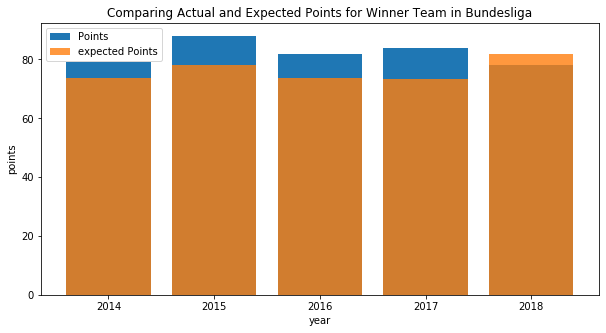

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(bu["year"],bu["pts"],label='Points')
ax.bar(bu["year"],bu["xpts"],label='expected Points',alpha=0.8)
ax.legend()
ax.set_xlabel('year')
ax.set_ylabel('points')
ax.set_title('Comparing Actual and Expected Points for Winner Team in Bundesliga')
plt.show()


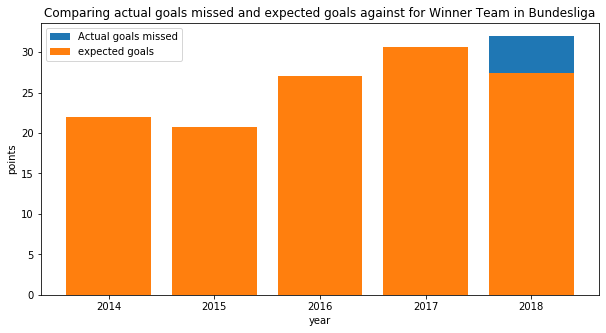

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(bu["year"],bu["missed"],label='Actual goals missed')
ax.bar(bu["year"],bu["xGA"],label='expected goals')
ax.legend()
ax.set_xlabel('year')
ax.set_ylabel('points')
ax.set_title('Comparing actual goals missed and expected goals against for Winner Team in Bundesliga')
plt.show()

By looking at the table and barchart we see that Bayern every year got more points that they should have, they scored more than expected and missed less than expected (except for 2018, which didn't break their plan of winning the season, but it gives some hints that Bayern played worse this year, although the competitors didn't take advantage of it)

In [10]:
# and from this table we see that Bayern dominates here totally, even when they do not play well
bu2=df_xg[(df_xg['position'] <= 2)&(df_xg['league']=='Bundesliga')].sort_values(by=['year','pts'], ascending=False)
bu2

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
272,Bundesliga,2018,1,Bayern Munich,88,92.240857,4.240857,32,27.412344,-4.587656,78,82.0030,4.0030
273,Bundesliga,2018,2,Borussia Dortmund,81,64.994402,-16.005598,44,42.875457,-1.124543,76,62.8540,-13.1460
254,Bundesliga,2017,1,Bayern Munich,92,76.548905,-15.451095,28,30.637835,2.637835,84,73.5197,-10.4803
255,Bundesliga,2017,2,Schalke 04,53,46.829516,-6.170484,37,39.419349,2.419349,63,51.6947,-11.3053
236,Bundesliga,2016,1,Bayern Munich,89,73.908589,-15.091411,22,27.042341,5.042341,82,73.7622,-8.2378
237,Bundesliga,2016,2,RasenBallsport Leipzig,66,55.091726,-10.908274,39,40.063822,1.063822,67,59.5370,-7.4630
218,Bundesliga,2015,1,Bayern Munich,80,77.041497,-2.958503,17,20.794377,3.794377,88,77.9685,-10.0315
219,Bundesliga,2015,2,Borussia Dortmund,82,83.410238,1.410238,34,29.177493,-4.822507,78,76.5776,-1.4224
200,Bundesliga,2014,1,Bayern Munich,80,66.205745,-13.794255,18,21.938729,3.938729,79,73.6116,-5.3884
201,Bundesliga,2014,2,Wolfsburg,72,58.347731,-13.652269,38,38.822021,0.822021,69,59.9509,-9.0491


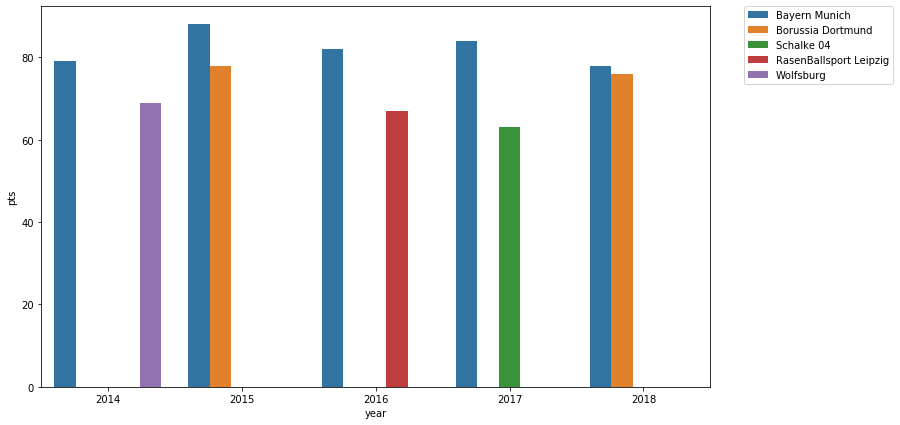

In [11]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x='year',y='pts',hue='team',data=bu2)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# La Liga

In [12]:
la=first_place[first_place['league']=='La_liga']
la

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,110,102.980152,-7.019848,21,28.444293,7.444293,94,94.0813,0.0813
20,La_liga,2015,1,Barcelona,112,113.598270,1.598270,29,34.029090,5.029090,91,94.3800,3.3800
40,La_liga,2016,1,Real Madrid,106,90.866410,-15.133590,41,36.862559,-4.137441,93,86.1701,-6.8299
60,La_liga,2017,1,Barcelona,99,90.486752,-8.513248,29,41.620820,12.620820,93,79.4375,-13.5625
80,La_liga,2018,1,Barcelona,90,83.279534,-6.720466,36,44.930950,8.930950,87,73.9604,-13.0396


In [13]:
def points(df,league):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(df["year"],df["pts"],label='Points')
    ax.bar(df["year"],df["xpts"],label='expected Points',alpha=0.8)
    ax.legend()
    ax.set_xlabel('year')
    ax.set_ylabel('points')
    ax.set_title('Comparing Actual and Expected Points for Winner Team in '+league)
    plt.show()

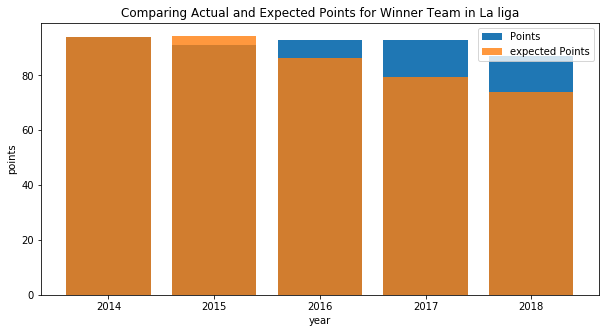

In [14]:
points(la,'La liga')

In [15]:
# comparing with runner-up
la2=df_xg[(df_xg['position'] <= 2) & (df_xg['league'] == 'La_liga')].sort_values(by=['year','xpts'], ascending=False)
la2

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
80,La_liga,2018,1,Barcelona,90,83.279534,-6.720466,36,44.930950,8.930950,87,73.9604,-13.0396
81,La_liga,2018,2,Atletico Madrid,55,51.872324,-3.127676,29,41.434059,12.434059,76,59.4276,-16.5724
60,La_liga,2017,1,Barcelona,99,90.486752,-8.513248,29,41.620820,12.620820,93,79.4375,-13.5625
61,La_liga,2017,2,Atletico Madrid,58,50.290480,-7.709520,22,35.483820,13.483820,79,61.5989,-17.4011
41,La_liga,2016,2,Barcelona,116,93.551594,-22.448406,37,31.315663,-5.684337,90,87.9535,-2.0465
40,La_liga,2016,1,Real Madrid,106,90.866410,-15.133590,41,36.862559,-4.137441,93,86.1701,-6.8299
20,La_liga,2015,1,Barcelona,112,113.598270,1.598270,29,34.029090,5.029090,91,94.3800,3.3800
21,La_liga,2015,2,Real Madrid,110,90.454148,-19.545852,34,45.233782,11.233782,90,79.0927,-10.9073
0,La_liga,2014,1,Barcelona,110,102.980152,-7.019848,21,28.444293,7.444293,94,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,118,95.766243,-22.233757,38,42.607198,4.607198,92,81.7489,-10.2511


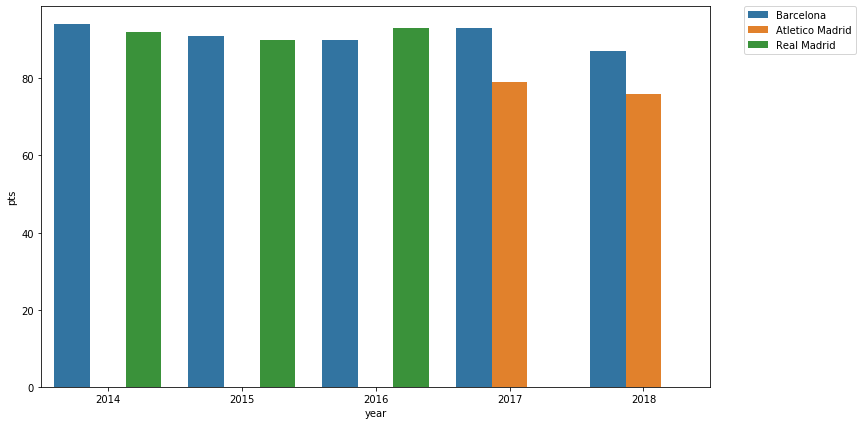

In [16]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x='year',y='pts',hue='team',data=la2)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# EPL

In [17]:
ep=first_place[first_place['league'] == 'EPL']
ep

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
100,EPL,2014,1,Chelsea,73,68.643320,-4.356680,32,31.524344,-0.475656,87,75.3172,-11.6828
120,EPL,2015,1,Leicester,68,68.416034,0.416034,36,45.019954,9.019954,81,68.9442,-12.0558
140,EPL,2016,1,Chelsea,85,61.796887,-23.203113,33,28.618919,-4.381081,93,75.7370,-17.2630
160,EPL,2017,1,Manchester City,106,91.434145,-14.565855,27,24.511918,-2.488082,100,91.0893,-8.9107
180,EPL,2018,1,Manchester City,95,93.720559,-1.279441,23,25.732604,2.732604,98,90.6406,-7.3594


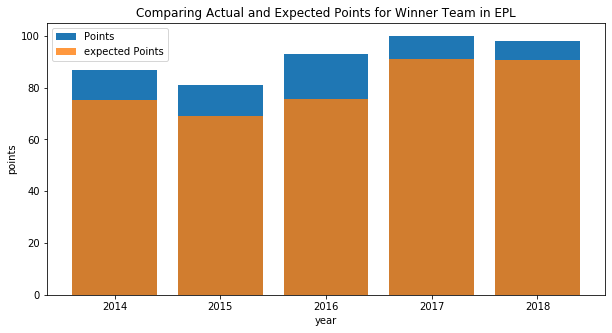

In [18]:
points(ep,'EPL')

In EPL we see the clear trend that tells you: "To win you have to be better than statistics". Interesting case here is Leicester story of victory in 2015: they got 12 points more than they should've and at the same time Arsenal got 6 points less of expected! This is why we love football, because such unexplicable things happen. I am not telling is total luck, but it played its' role here.

Another interesting thing is Manchester City of 2018 - they are super stable! They scored just one goal more than expected, missed 2 less and got 7 additional points, while Liverpool fought really well, had little bit more luck on their side, but couldn't win despite being 13 points ahead of their expected.

Pep is finishing building the machine of destruction. Man City creates and converts their moments based on skill and do not rely on luck - it makes them very dangerous in the next season.

In [19]:
# comparing with runner-ups
ep2=df_xg[(df_xg['position'] <= 2) & (df_xg['league'] == 'EPL')].sort_values(by=['year','xpts'], ascending=False)
ep2

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
180,EPL,2018,1,Manchester City,95,93.720559,-1.279441,23,25.732604,2.732604,98,90.6406,-7.3594
181,EPL,2018,2,Liverpool,89,79.457540,-9.542460,22,29.145105,7.145105,97,83.4541,-13.5459
160,EPL,2017,1,Manchester City,106,91.434145,-14.565855,27,24.511918,-2.488082,100,91.0893,-8.9107
161,EPL,2017,2,Manchester United,68,59.043412,-8.956588,28,43.540152,15.540152,81,62.3307,-18.6693
140,EPL,2016,1,Chelsea,85,61.796887,-23.203113,33,28.618919,-4.381081,93,75.7370,-17.2630
141,EPL,2016,2,Tottenham,86,70.065979,-15.934021,26,33.781933,7.781933,86,75.3717,-10.6283
121,EPL,2015,2,Arsenal,65,73.530928,8.530928,36,33.857479,-2.142521,71,77.0087,6.0087
120,EPL,2015,1,Leicester,68,68.416034,0.416034,36,45.019954,9.019954,81,68.9442,-12.0558
100,EPL,2014,1,Chelsea,73,68.643320,-4.356680,32,31.524344,-0.475656,87,75.3172,-11.6828
101,EPL,2014,2,Manchester City,83,75.815441,-7.184559,38,40.499403,2.499403,79,73.0982,-5.9018


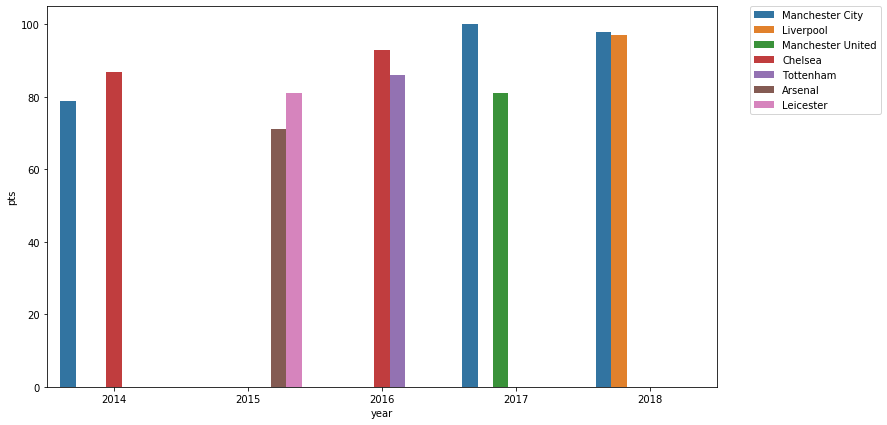

In [20]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x='year',y='pts',hue='team',data=ep2)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Ligue 1

In [21]:
li=first_place[first_place['league'] == 'Ligue_1']
li

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
390,Ligue_1,2014,1,Paris Saint Germain,83,78.419930,-4.580070,36,28.240364,-7.759636,83,84.1042,1.1042
410,Ligue_1,2015,1,Paris Saint Germain,102,86.200951,-15.799049,19,24.365492,5.365492,96,90.2748,-5.7252
430,Ligue_1,2016,1,Monaco,107,76.036980,-30.963020,31,34.893628,3.893628,95,78.0559,-16.9441
450,Ligue_1,2017,1,Paris Saint Germain,108,89.924296,-18.075704,29,32.096711,3.096711,93,84.6069,-8.3931
470,Ligue_1,2018,1,Paris Saint Germain,105,95.344060,-9.655940,35,36.782405,1.782405,91,86.0429,-4.9571


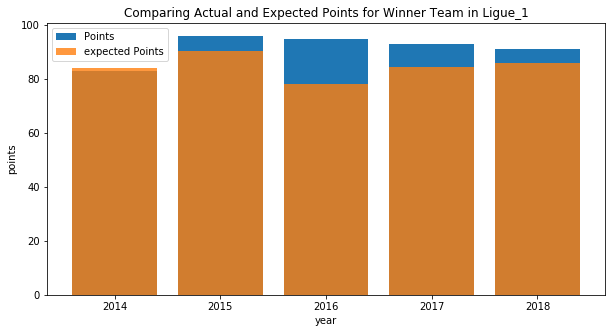

In [22]:
points(li,'Ligue_1')

In French Ligue 1 we continue to see the trend "to win you have to execute 110%, because 100% is not enough". Here Paris Saint Germain dominates totally. Only in 2016 we get an outlier in the face of Monaco that scored 30 goals more than expected!!! and got almost 17 points more than expected! Luck? Quite a good piece of it. PSG was good that year, but Monaco was extraordinary. Again, we cannot claim it's pure luck or pure skill, but a perfect combination of both in right place and time.

In [23]:
# comparing with runner-ups
li2=df_xg[(df_xg['position'] <= 2) & (df_xg['league'] == 'Ligue_1')].sort_values(by=['year','xpts'], ascending=False)
li2

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
470,Ligue_1,2018,1,Paris Saint Germain,105,95.344060,-9.655940,35,36.782405,1.782405,91,86.0429,-4.9571
471,Ligue_1,2018,2,Lille,68,60.006656,-7.993344,33,39.847530,6.847530,75,67.0171,-7.9829
450,Ligue_1,2017,1,Paris Saint Germain,108,89.924296,-18.075704,29,32.096711,3.096711,93,84.6069,-8.3931
451,Ligue_1,2017,2,Monaco,85,62.411927,-22.588073,45,45.271219,0.271219,80,65.1451,-14.8549
431,Ligue_1,2016,2,Paris Saint Germain,83,82.162399,-0.837601,27,24.247968,-2.752032,87,87.2195,0.2195
430,Ligue_1,2016,1,Monaco,107,76.036980,-30.963020,31,34.893628,3.893628,95,78.0559,-16.9441
410,Ligue_1,2015,1,Paris Saint Germain,102,86.200951,-15.799049,19,24.365492,5.365492,96,90.2748,-5.7252
411,Ligue_1,2015,2,Lyon,67,63.008171,-3.991829,43,38.008802,-4.991198,65,68.6877,3.6877
390,Ligue_1,2014,1,Paris Saint Germain,83,78.419930,-4.580070,36,28.240364,-7.759636,83,84.1042,1.1042
391,Ligue_1,2014,2,Lyon,72,62.851829,-9.148171,33,41.708588,8.708588,75,65.6192,-9.3808


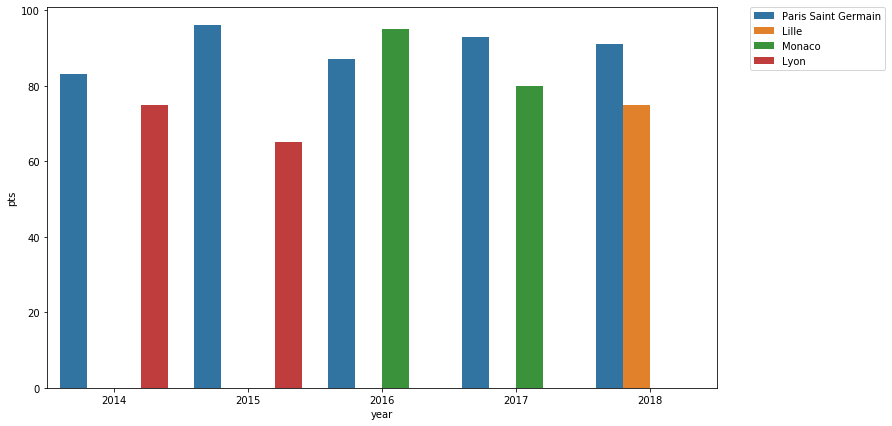

In [24]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x='year',y='pts',hue='team',data=li2)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Serie A

In [25]:
se=first_place[first_place['league'] == 'Serie_A']
se

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
290,Serie_A,2014,1,Juventus,72,59.077044,-12.922956,24,29.129634,5.129634,87,74.7890,-12.2110
310,Serie_A,2015,1,Juventus,75,62.989649,-12.010351,20,22.998835,2.998835,91,78.7434,-12.2566
330,Serie_A,2016,1,Juventus,77,68.736204,-8.263796,27,23.597126,-3.402874,91,82.8633,-8.1367
350,Serie_A,2017,1,Juventus,86,59.228735,-26.771265,24,28.577357,4.577357,95,73.5058,-21.4942
370,Serie_A,2018,1,Juventus,70,64.527180,-5.472820,30,35.032053,5.032053,90,70.9299,-19.0701


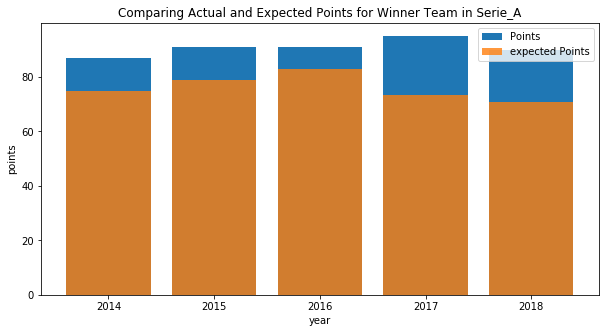

In [26]:
points(se,'Serie_A')

In Italian Serie A Juventus is dominating 8 years in a row although cannot show any major success in Champions League. I think by checking this chart and numbers we can understand that Juve doesn't have strong enough competiton inside the country and gets lots of "lucky" points, which again derives from multiple factors and we can see that Napoli outperformed Juventus by xPTS twice, but it is a real life and in, for example 2017, Juve was crazy and scored additional 26 goals (or created goals from nowhere), while Napoli missed 3 more than expected (due to error of goalkeeper or maybe excelence of some team in 1 or 2 particular matches). As with the situation in La Liga when Real Madrid became a champion I am sure we can find 1 or 2 games that was key that year.

Details matter in football. You see, one error here, one woodwork there and you've lost the title.

In [27]:
# comparing to runner-ups
se2=df_xg[(df_xg['position'] <= 2) & (df_xg['league'] == 'Serie_A')].sort_values(by=['year','xpts'], ascending=False)
se2

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
371,Serie_A,2018,2,Napoli,74,68.237943,-5.762057,36,36.502336,0.502336,79,74.4511,-4.5489
370,Serie_A,2018,1,Juventus,70,64.527180,-5.472820,30,35.032053,5.032053,90,70.9299,-19.0701
351,Serie_A,2017,2,Napoli,77,70.453625,-6.546375,29,25.266163,-3.733837,91,82.2324,-8.7676
350,Serie_A,2017,1,Juventus,86,59.228735,-26.771265,24,28.577357,4.577357,95,73.5058,-21.4942
330,Serie_A,2016,1,Juventus,77,68.736204,-8.263796,27,23.597126,-3.402874,91,82.8633,-8.1367
331,Serie_A,2016,2,Roma,90,82.996525,-7.003475,38,41.075720,3.075720,87,77.3906,-9.6094
311,Serie_A,2015,2,Napoli,80,69.526830,-10.473170,32,26.685810,-5.314190,82,79.0669,-2.9331
310,Serie_A,2015,1,Juventus,75,62.989649,-12.010351,20,22.998835,2.998835,91,78.7434,-12.2566
290,Serie_A,2014,1,Juventus,72,59.077044,-12.922956,24,29.129634,5.129634,87,74.7890,-12.2110
291,Serie_A,2014,2,Roma,54,50.853662,-3.146338,31,36.787303,5.787303,70,62.1641,-7.8359


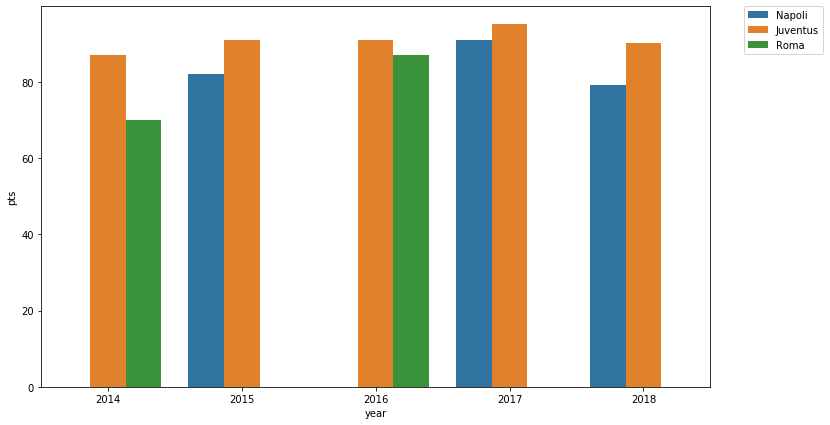

In [28]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x='year',y='pts',hue='team',data=se2)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# RFPL

In [29]:
rf=first_place[first_place['league'] == 'RFPL']
rf

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
490,RFPL,2014,1,Zenit St. Petersburg,58,50.517910,-7.482090,17,16.838674,-0.161326,67,63.8448,-3.1552
506,RFPL,2015,1,CSKA Moscow,51,49.466551,-1.533449,25,25.263951,0.263951,65,58.3465,-6.6535
522,RFPL,2016,1,Spartak Moscow,46,35.675737,-10.324263,27,30.312933,3.312932,69,45.0015,-23.9985
538,RFPL,2017,1,Lokomotiv Moscow,41,36.416852,-4.583148,21,23.289256,2.289256,60,50.7869,-9.2131
554,RFPL,2018,1,Zenit St. Petersburg,57,49.460061,-7.539939,29,27.269833,-1.730167,64,56.4712,-7.5288


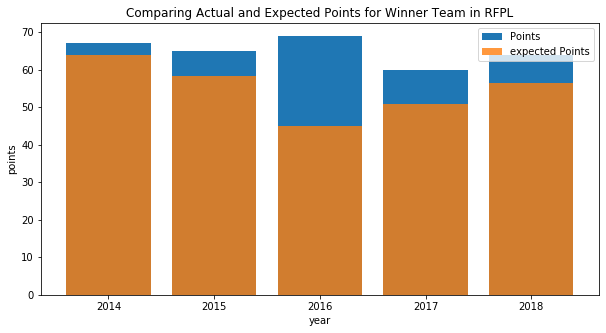

In [30]:
points(rf,'RFPL')

I do not follow Russian Premier League, so just by coldly looking at data we see the same pattern as scoring more than you deserve and also intersting situation with CSKA Moscow from 2015 to 2017. During these years these guys were good, but converted their advantages only once, the others two - if you do not convert, you get punished or your main competitor just converts better.

There is no justice in football :D. Although, I believe with VAR the numbers will become more stable in next seasons. Because one of the reasons of those additional goals and points are errors of arbiters.

In [31]:
# comparing to runner-ups
ep2=df_xg[(df_xg['position'] <= 2) & (df_xg['league'] == 'RFPL')].sort_values(by=['year','xpts'], ascending=False)
ep2

,league,year,position,team,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
554,RFPL,2018,1,Zenit St. Petersburg,57,49.460061,-7.539939,29,27.269833,-1.730167,64,56.4712,-7.5288
555,RFPL,2018,2,Lokomotiv Moscow,45,42.248143,-2.751857,28,30.119537,2.119537,56,50.5806,-5.4194
539,RFPL,2017,2,CSKA Moscow,49,45.707394,-3.292606,23,26.553497,3.553497,58,53.6637,-4.3363
538,RFPL,2017,1,Lokomotiv Moscow,41,36.416852,-4.583148,21,23.289256,2.289256,60,50.7869,-9.2131
523,RFPL,2016,2,CSKA Moscow,47,37.065576,-9.934424,15,19.619785,4.619785,62,54.3233,-7.6767
522,RFPL,2016,1,Spartak Moscow,46,35.675737,-10.324263,27,30.312933,3.312932,69,45.0015,-23.9985
506,RFPL,2015,1,CSKA Moscow,51,49.466551,-1.533449,25,25.263951,0.263951,65,58.3465,-6.6535
507,RFPL,2015,2,FC Rostov,41,37.228557,-3.771443,20,27.333497,7.333497,63,47.2366,-15.7634
490,RFPL,2014,1,Zenit St. Petersburg,58,50.517910,-7.482090,17,16.838674,-0.161326,67,63.8448,-3.1552
491,RFPL,2014,2,CSKA Moscow,67,51.022039,-15.977961,27,28.801404,1.801404,60,54.5644,-5.4356


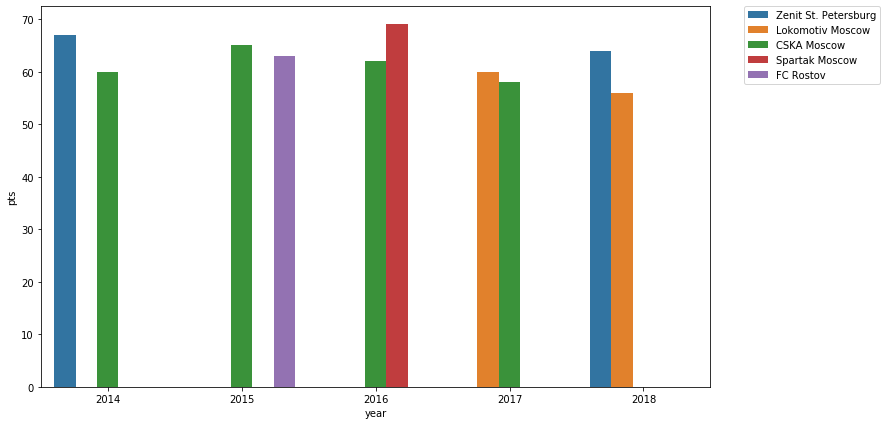

In [32]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x='year',y='pts',hue='team',data=ep2)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Statistical Overview
As there are 6 leagues with different teams and stats, I decided to focus on one in the beginning to test different approaches and then replicate the final analysis model on other 5. And as I watch mostly EPL I will start with this competiton as I know the most about it.

In [72]:
# Creating separate DataFrames per each league
EPL = df_xg[df_xg['league'] == 'EPL']
print(EPL)
EPL.describe()


    league  year  position               team  scored         xG   xG_diff  \
100    EPL  2014         1            Chelsea      73  68.643320 -4.356680   
101    EPL  2014         2    Manchester City      83  75.815441 -7.184559   
102    EPL  2014         3            Arsenal      71  69.802591 -1.197409   
103    EPL  2014         4  Manchester United      62  54.206860 -7.793140   
104    EPL  2014         5          Tottenham      58  52.385284 -5.614716   
..     ...   ...       ...                ...     ...        ...       ...   
195    EPL  2018        16        Southampton      45  49.671325  4.671325   
196    EPL  2018        17           Brighton      35  37.027868  2.027868   
197    EPL  2018        18            Cardiff      34  41.769727  7.769727   
198    EPL  2018        19             Fulham      34  42.621864  8.621864   
199    EPL  2018        20       Huddersfield      22  29.002263  7.002263   

     missed        xGA  xGA_diff  pts     xpts  xpts_diff  
100

,year,position,scored,xG,xG_diff,missed,xGA,xGA_diff,pts,xpts,xpts_diff
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2016.000000,10.500000,51.550000,50.082649,-1.467351,51.550000,50.082649,-1.467351,52.460000,52.518434,0.058434
std,1.421338,5.795331,17.062793,13.969879,6.075383,13.030171,10.793430,6.491953,18.118811,14.437364,7.229899
min,2014.000000,1.000000,22.000000,26.527059,-23.203113,22.000000,24.511918,-16.990427,16.000000,29.610600,-18.669300
25%,2015.000000,5.750000,39.750000,39.689538,-5.036223,41.750000,43.426284,-5.568798,40.000000,41.241400,-4.232600
50%,2016.000000,10.500000,47.500000,47.280628,-0.835175,51.500000,51.894174,-1.788872,47.000000,48.376750,0.944850
75%,2017.000000,15.250000,62.250000,57.881744,2.718650,60.250000,57.323649,2.771989,66.000000,61.924575,4.583025
max,2018.000000,20.000000,106.000000,93.720559,11.749704,81.000000,73.586610,15.540152,100.000000,91.089300,14.034500


In [71]:
def print_records_antirecords(df):
  print('Presenting some records and antirecords: \n')
  for col in df.describe().columns:
    if col not in ['index', 'year', 'position']:
      team_min = df['team'].loc[df[col] == df.describe().loc['min',col]].values[0]
      year_min = df['year'].loc[df[col] == df.describe().loc['min',col]].values[0]
      team_max = df['team'].loc[df[col] == df.describe().loc['max',col]].values[0]
      year_max = df['year'].loc[df[col] == df.describe().loc['max',col]].values[0]
      val_min = df.describe().loc['min',col]
      val_max = df.describe().loc['max',col]
      print('The lowest value of {0} had {1} in {2} and it is equal to {3:.2f}'.format(col.upper(), team_min, year_min, val_min))
      print('The highest value of {0} had {1} in {2} and it is equal to {3:.2f}'.format(col.upper(), team_max, year_max, val_max))
      print('='*100)

In [73]:
# replace EPL with any league you want
print_records_antirecords(EPL)

Presenting some records and antirecords: 

The lowest value of SCORED had Huddersfield in 2018 and it is equal to 22.00
The highest value of SCORED had Manchester City in 2017 and it is equal to 106.00
The lowest value of XG had Aston Villa in 2015 and it is equal to 26.53
The highest value of XG had Manchester City in 2018 and it is equal to 93.72
The lowest value of XG_DIFF had Chelsea in 2016 and it is equal to -23.20
The highest value of XG_DIFF had Crystal Palace in 2017 and it is equal to 11.75
The lowest value of MISSED had Liverpool in 2018 and it is equal to 22.00
The highest value of MISSED had Fulham in 2018 and it is equal to 81.00
The lowest value of XGA had Manchester City in 2017 and it is equal to 24.51
The highest value of XGA had Fulham in 2018 and it is equal to 73.59
The lowest value of XGA_DIFF had Aston Villa in 2015 and it is equal to -16.99
The highest value of XGA_DIFF had Manchester United in 2017 and it is equal to 15.54
The lowest value of PTS had Huddersfie

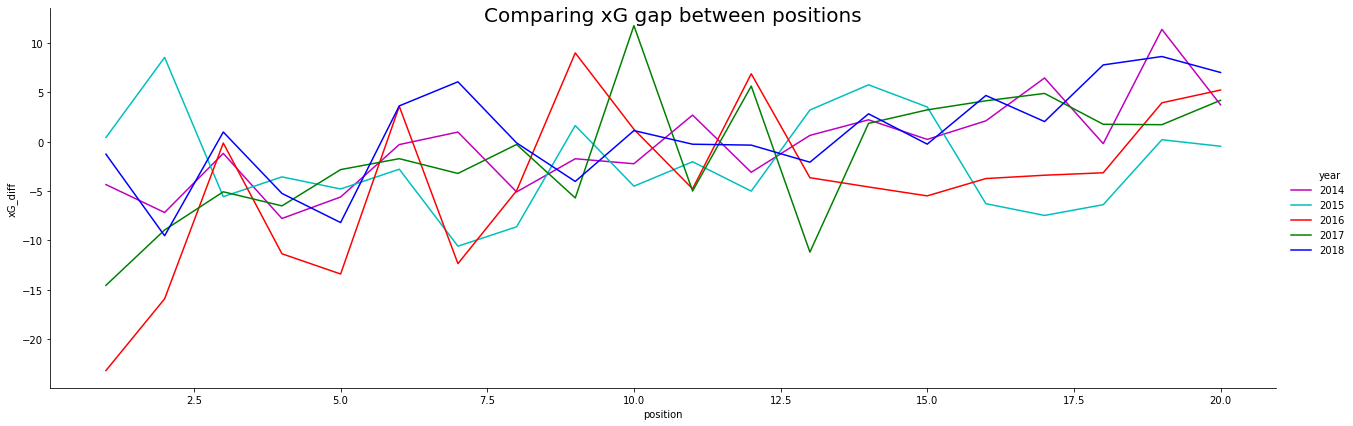

In [111]:
#sns.set_palette(['blue','red','green','yellow','purple'])
hue_colors = {2018:'b',2017:'g',2016:'r',2015:'c',2014:'m'}
g=sns.relplot(x='position',y='xG_diff',hue='year',data=EPL,kind='line',palette=hue_colors,
            height=6,aspect=3)
g.fig.suptitle('Comparing xG gap between positions',fontsize=20)

plt.show()

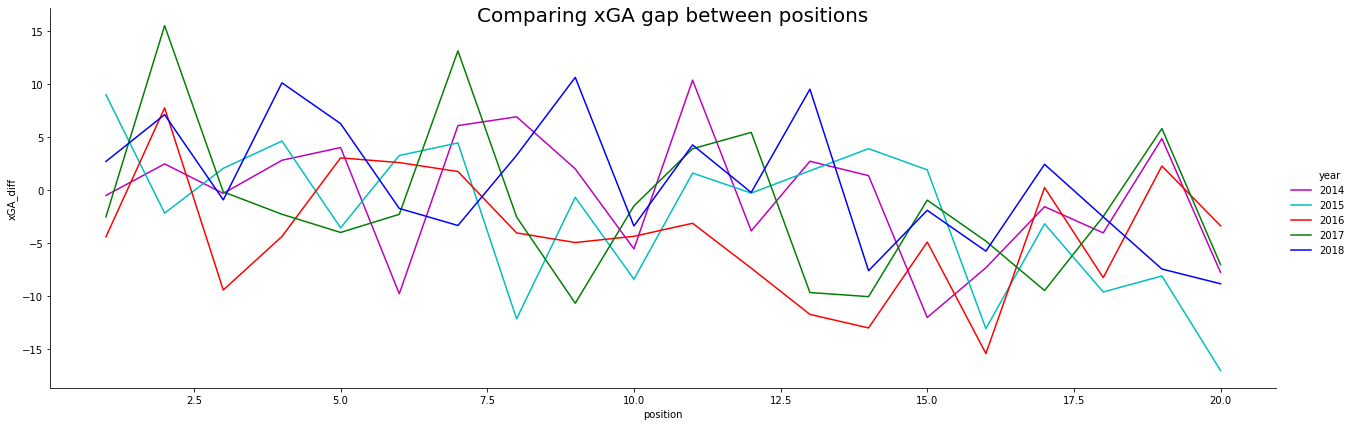

In [115]:
#sns.set_palette(['blue','red','green','yellow','purple'])
hue_colors = {2018:'b',2017:'g',2016:'r',2015:'c',2014:'m'}
g=sns.relplot(x='position',y='xGA_diff',hue='year',data=EPL,kind='line',palette=hue_colors,
            height=6,aspect=3)
g.fig.suptitle('Comparing xGA gap between positions',fontsize=20)

plt.show()

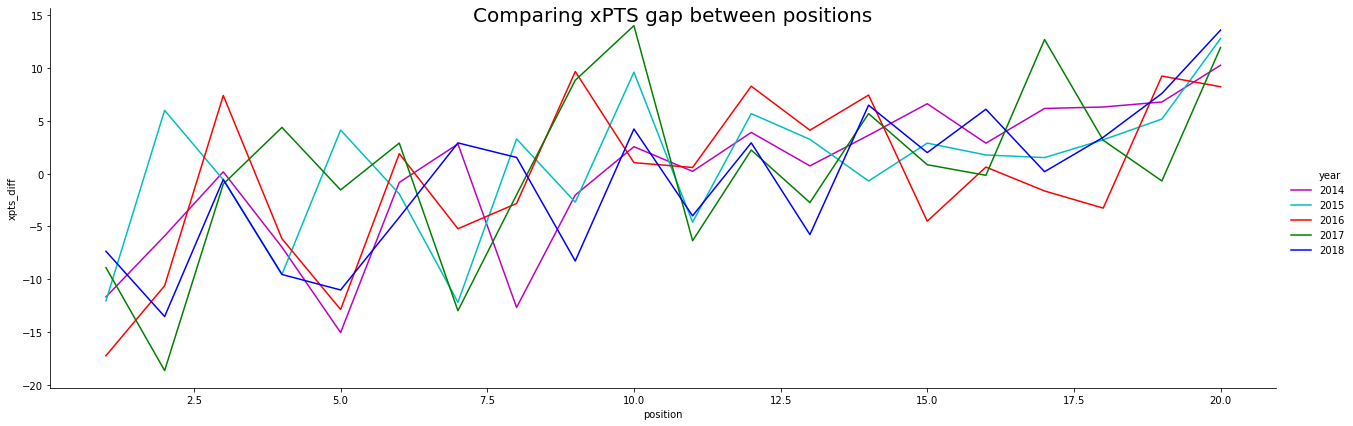

In [112]:
#sns.set_palette(['blue','red','green','yellow','purple'])
hue_colors = {2018:'b',2017:'g',2016:'r',2015:'c',2014:'m'}
g=sns.relplot(x='position',y='xpts_diff',hue='year',data=EPL,kind='line',palette=hue_colors,
            height=6,aspect=3)
g.fig.suptitle('Comparing xPTS gap between positions',fontsize=20)

plt.show()

From the charts above we can clearly see that top teams score more, concede less and get more points than expected. That's why these teams are top teams. And totally opposite situation with outsiders. The teams from the middleplay average. Totally logical, no huge insights here.

In [119]:
# Check mean differences
def league_mean(df):
    m=df.groupby('year')[['xG_diff', 'xGA_diff', 'xpts_diff']].mean()
    return m 

league_mean(EPL)

,xG_diff,xGA_diff,xpts_diff
year,,,
2014,-0.424778,-0.424778,-0.100485
2015,-2.249743,-2.249743,0.754025
2016,-4.022599,-4.022599,-0.289995
2017,-1.301569,-1.301569,0.587285
2018,0.661933,0.661933,-0.658660


In [120]:
# Check median differences
def league_median(df):
    me=df.groupby('year')[['xG_diff', 'xGA_diff', 'xpts_diff']].median()
    return me 

league_median(EPL)

,xG_diff,xGA_diff,xpts_diff
year,,,
2014,-0.255871,0.555471,1.64645
2015,-3.187092,-0.450639,2.33330
2016,-3.702305,-4.338050,0.60515
2017,-1.011577,-2.356850,0.34520
2018,0.417069,-0.544014,0.86190
